# Pengenalan

Kecelakaan kapal Titanic merupakan kecelakaan yang sangat besar, banyak orang yang kehilangan keluarganya karna kecelakaan ini. Tidak sedikit penumpang yang tidak dikabarkan tentang status kehidupannya, oleh karna itulah project Titanic prediction ini dibuat. Titanic Prediction berguna untuk memprediksi apakah penumpang kapal Titanic masih hidup atau tidak. 
Data yang digunakan adalah data kapal Titanic. Data berjumlah sebanyak 891 dan didapatkan dari kaggle. Terdapat 12 kelas pada data ini, yaitu:
1.	Survival = Survival
2.	Pclass = Ticket Class
3.	Sex = Sex
4.	Age = Age in years
5.	Sibsp = # of siblings / spouses aboard the Titanic
6.	Parch = # of parents / children aboard the Titanic
7.	Ticket = Ticket number
8.	Fare = Passenger fare
9.	Cabin = Cabin number
10.	Embarked = Port of Embarkation
11.	PassangerId = unique value
12.	Name = Name

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


# Import Library

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pickle

# Data Loading & EDA

In [2]:
df = pd.read_csv('Titanic.csv')
df_test = pd.read_csv('test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df_survived = df['Survived'].value_counts()
df_pclass = df['Pclass'].value_counts()
df_sex = df['Sex'].value_counts()
df_age = df['Age'].value_counts()
df_sibsp = df['SibSp'].value_counts()
df_parch = df['Parch'].value_counts()
df_fare = df['Fare'].value_counts()
df_embarked = df['Embarked'].value_counts()

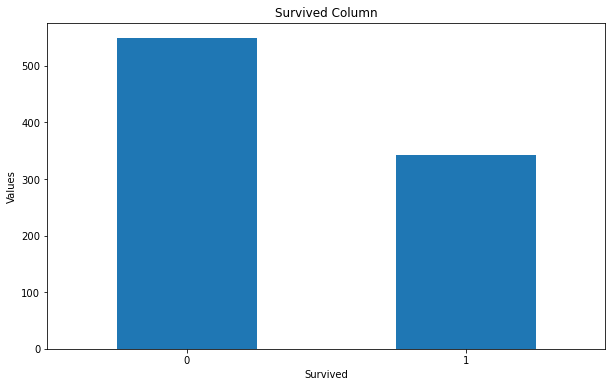

In [5]:
df_survived.plot(kind='bar', figsize=(10,6))
plt.xlabel('Survived')
plt.xticks(rotation = 360)
plt.ylabel('Values')
plt.title('Survived Column')
plt.show()

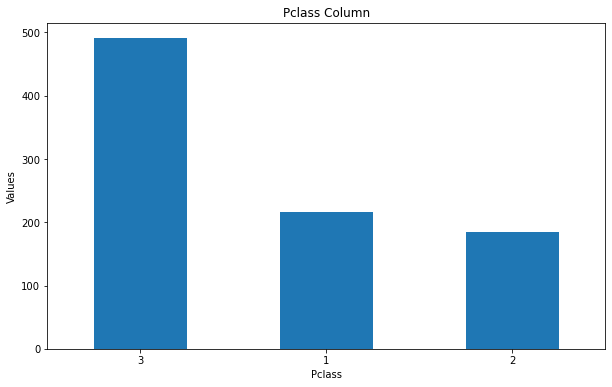

In [6]:
df_pclass.plot(kind='bar', figsize=(10,6))
plt.xlabel('Pclass')
plt.xticks(rotation = 360)
plt.ylabel('Values')
plt.title('Pclass Column')
plt.show()

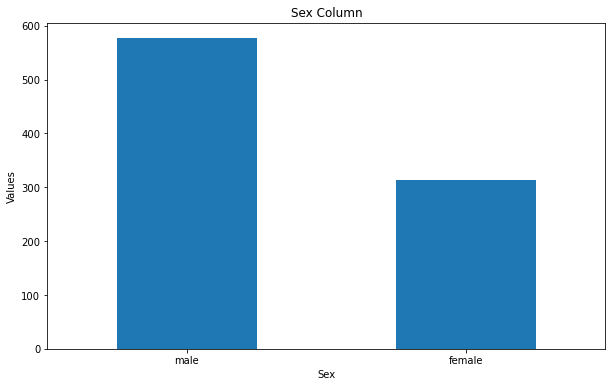

In [7]:
df_sex.plot(kind='bar', figsize=(10,6))
plt.xlabel('Sex')
plt.xticks(rotation = 360)
plt.ylabel('Values')
plt.title('Sex Column')
plt.show()

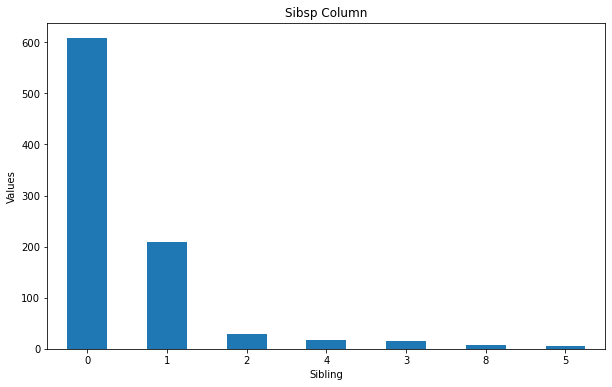

In [48]:
df_sibsp.plot(kind='bar', figsize=(10,6))
plt.xlabel('Sibling')
plt.xticks(rotation = 360)
plt.ylabel('Values')
plt.title('Sibsp Column')
plt.show()

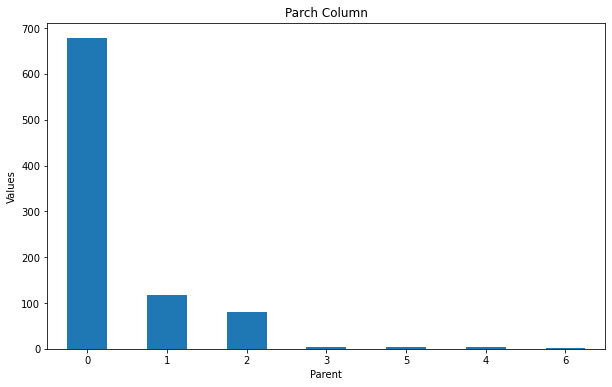

In [47]:
df_parch.plot(kind='bar', figsize=(10,6))
plt.xlabel('Parent')
plt.xticks(rotation = 360)
plt.ylabel('Values')
plt.title('Parch Column')
plt.show()

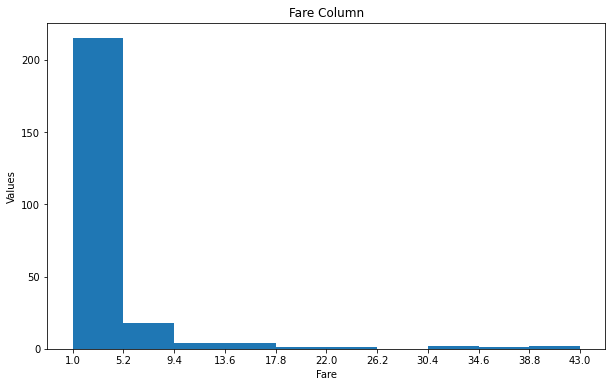

In [49]:
count, bin_edges = np.histogram(df_fare)

df_fare.plot(kind='hist', figsize=(10,6), xticks=bin_edges)
plt.xlabel('Fare')
plt.xticks(rotation = 360)
plt.ylabel('Values')
plt.title('Fare Column')
plt.show()

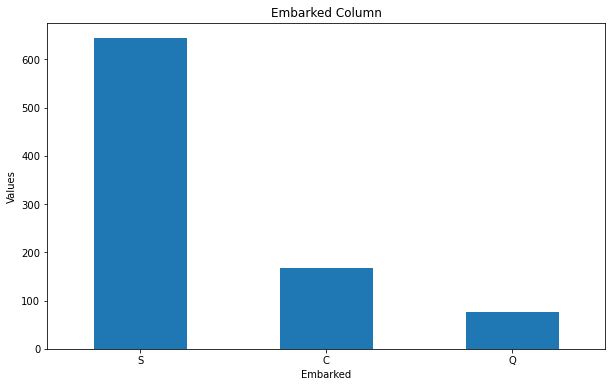

In [50]:
df_embarked.plot(kind='bar', figsize=(10,6))
plt.xlabel('Embarked')
plt.xticks(rotation = 360)
plt.ylabel('Values')
plt.title('Embarked Column')
plt.show()

# Data Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Menghitung persentase dari tiap kolom yang null
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
#Drop kolom Cabin karna memiliki null yang tinggi yaitu di atas 70%
df.drop('Cabin', axis=1, inplace=True)

In [16]:
#Mengisi null pada kolom Age dengan median dari kolom Age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [17]:
#Mengisi null pada kolom Embarked dengan mode dari kolom Embarked
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [18]:
#Memetakan setiap nilai menjadi sebuah angka
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])

In [19]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Sex']]
y = df['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pendefinisian Model

In [21]:
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Pelatihan Model

In [22]:
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))

Accuracy Score: 0.8134328358208955


In [23]:
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))

Accuracy Score: 0.746268656716418


In [24]:
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

Accuracy Score: 0.7761194029850746


# Evaluasi Model

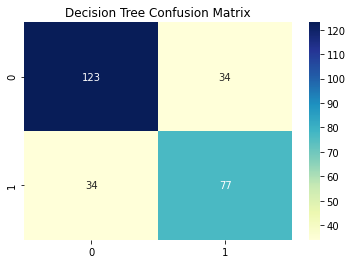

In [25]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
ax_dt = sns.heatmap(cm_dt,annot=True, fmt="d", cmap="YlGnBu").set_title("Decision Tree Confusion Matrix")

In [26]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       157
           1       0.69      0.69      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



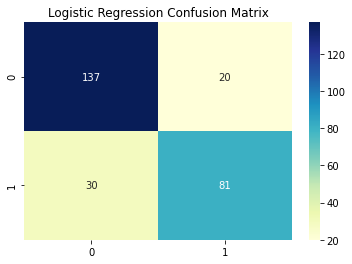

In [27]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
ax_lr = sns.heatmap(cm_lr,annot=True, fmt="d", cmap="YlGnBu").set_title("Logistic Regression Confusion Matrix")

In [28]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



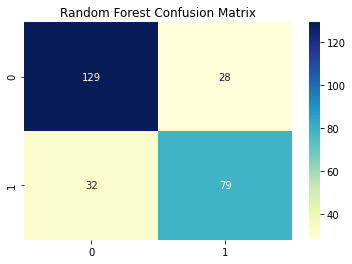

In [29]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
ax_rf = sns.heatmap(cm_rf,annot=True, fmt="d", cmap="YlGnBu").set_title("Random Forest Confusion Matrix")

In [30]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.74      0.71      0.72       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



# Model Saving

In [39]:
pickle.dump(logistic_regression, open('model_classifier.pkl','wb'))

# Model Inference

In [31]:
logistic_regression.predict(df_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# Kesimpulan

Kesimpulan yang dapat ditarik dari model di atas adalah model memiliki tingkat akurasi yang cukup baik sehingga dapat digunakan untuk memprediksi penumpang kapal Titanic masih bertahan atau tidak.